# EEPS520 - Analyzing oil prices  / Barış Sanlı barissanli2@gmail.com

# Homework 4 - Should we sell or buy?

In this example, we will decide whether to sell or buy oil based on Moving Averages and standart deviation

*   Download data for oil for the next month (CL=F)
*   Generate statistical summaries
# *   Calculate Moving Averages, Standart deviation and Mean

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#this library for getting data
from pandas_datareader import data
#!pip3 install pandas

Let's download data from Yahoo for next month delivery oil price (CL=F)

In [3]:
#Month/Day/Year
start='8/1/2020'
end='10/19/2020'
price = data.DataReader("CL=F", data_source='yahoo', start=start, end=end)
#CL=F next month crude
#GC=F next month gold

Now check the last 2 lines of the data

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
price.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-09,41.470001,40.380001,41.310001,40.599998,409787.0,40.599998
2020-10-12,40.450001,39.040001,40.400002,39.139999,218411.0,39.139999


Any data frame with ".describe()" gives you the statistical summary of each column

In [5]:
#price[columns][-lastdays:]
LASTDAYS=10
price[:][-LASTDAYS:].describe()

,High,Low,Open,Close,Volume,Adj Close
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,40.437001,38.589000,39.612001,39.605000,380492.300000,39.605000
std,0.805082,1.196397,1.194161,1.197620,63991.979774,1.197620
min,38.650002,36.630001,37.000000,37.049999,218411.000000,37.049999
25%,40.354999,37.810000,39.207500,39.160000,378834.000000,39.160000
50%,40.460001,38.860001,39.865002,39.620001,395979.500000,39.620001
75%,40.820001,39.234999,40.297502,40.504999,409787.000000,40.504999
max,41.470001,40.380001,41.310001,41.189999,443442.000000,41.189999


Now for technical analysis, we will calculate 3 variables
*   Exponential Moving Average (EMA)
*   Simple Moving Average for 8 and 20 days



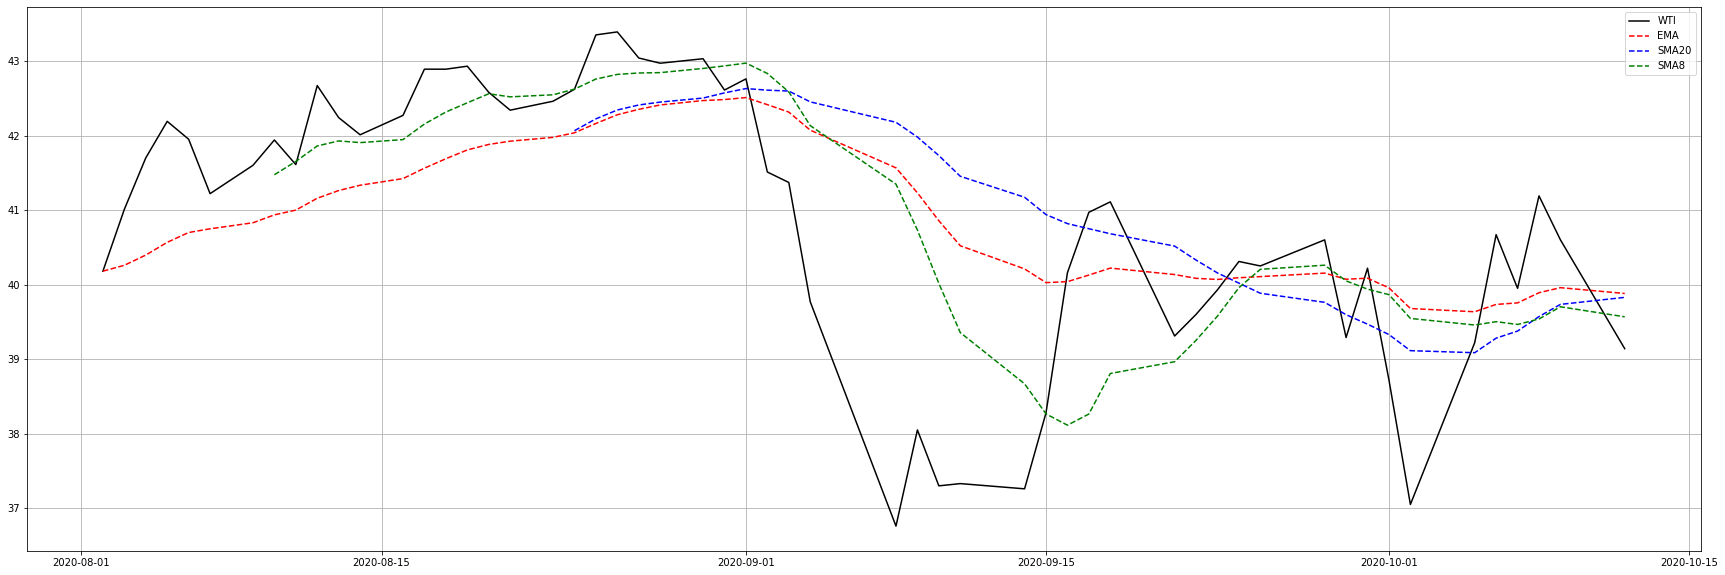

In [6]:
# Do not change anything here, just comment on this
figure(figsize=(30,10))    #image size
grid(which="both")         # put the grid lines 

# https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
EMA=price.Close.ewm(span=20, adjust=False).mean()
SMA20=price.Close.rolling(window=20).mean()
SMA8=price.Close.rolling(window=8).mean()
plot(price.Close,'k',label="WTI")
plot(EMA,'r--',label="EMA")
plot(SMA20,'b--', label="SMA20")
plot(SMA8,'g--', label="SMA8")
legend(loc="upper right")

In [7]:
# Now this is the part you change and graph results

DAYS=10
STD=1.5

price['MA'] = price['Close'].rolling(window=DAYS).mean()
# set .std(ddof=0) for population std instead of sample
price['STD'] = price['Close'].rolling(window=DAYS).std() 
    
price['UpperBand'] = price['MA'] + (price['STD'] * STD)
price['LowerBand'] = price['MA'] - (price['STD'] * STD)

Short term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the standard dev. +/- the SMA)

Medium term: 20 day moving average, bands at 2 standard deviations.

Long term: 50 day moving average, bands at 2.5 standard deviations

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands

Let's draw a simple graph
List the columns to plot and then call .plot() to graph

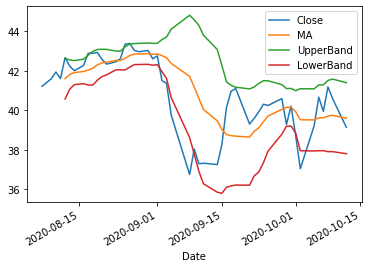

In [8]:
price[['Close', 'MA', 'UpperBand', 'LowerBand']][-50:].plot()

This is a much better graph with styles for each columns and grid as well as title

Text(0.5, 1.0, 'Bollinger Graph for Oil prices')

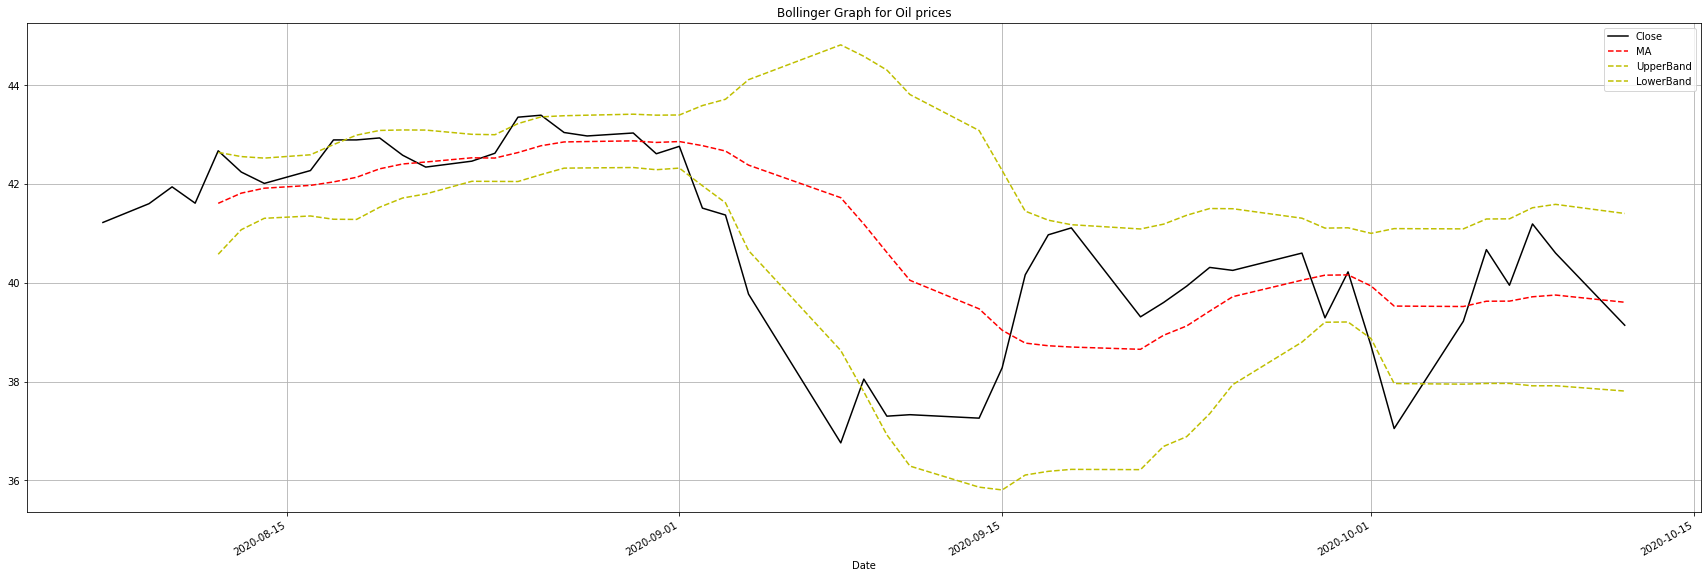

In [9]:
styles = ['k-','r--','y--','y--']
price[['Close', 'MA', 'UpperBand', 'LowerBand']][-50:].plot(style=styles, figure=figsize(30,10), grid="both")
title("Bollinger Graph for Oil prices")